# Visualisations and descriptive statistics

This notebook contains some basic visualisations and descriptive statistics.

In [1]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
figsize = (12, 9)

In [2]:
import pandas as pd
import glob

In [3]:
dataframes = []

for f in glob.glob("fallzahlen_kanton_total_csv/COVID19_Fallzahlen_Kanton_*total.csv"):
    dataframes.append(pd.read_csv(f))

df = pd.concat(dataframes)

df['date'] = pd.to_datetime(df['date'], dayfirst=True)

/Users/thead/miniconda/envs/sk-playground/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


In [4]:
df.head()

,TotalCured,TotalPosTests1,abbreviation_canton_and_fl,date,ncumul_ICU,ncumul_conf,ncumul_deceased,ncumul_hosp,ncumul_released,ncumul_tested,ncumul_vent,source,time
0,NaN,NaN,AG,2020-02-28,NaN,1.0,NaN,NaN,NaN,NaN,NaN,https://www.ag.ch/media/kanton_aargau/themen_1...,15:00
1,NaN,NaN,AG,2020-03-02,NaN,2.0,NaN,NaN,NaN,NaN,NaN,https://www.ag.ch/media/kanton_aargau/themen_1...,18:00
2,NaN,NaN,AG,2020-03-03,NaN,6.0,NaN,NaN,NaN,NaN,NaN,https://www.ag.ch/media/kanton_aargau/themen_1...,15:00
3,NaN,NaN,AG,2020-03-04,NaN,7.0,NaN,NaN,NaN,NaN,NaN,https://www.ag.ch/media/kanton_aargau/themen_1...,15:00
4,NaN,NaN,AG,2020-03-05,NaN,9.0,NaN,NaN,NaN,NaN,NaN,https://www.ag.ch/media/kanton_aargau/themen_1...,15:00


In [5]:
def transform_df(df, column, pretty_name):
    """Pick out one column of interest"""
    df = (df
          .rename(columns={"abbreviation_canton_and_fl": "Canton",
                           column: pretty_name,
                           "date": "Date"})
          .pivot_table(index="Date",
                       values=[pretty_name],
                       columns=['Canton'])
         )
    # Create a row for every day
    all_days = pd.date_range(df.index.min(), df.index.max(), freq='D')
    df = df.reindex(all_days)
    # Fill missing values with previous day's number
    df.fillna(method='pad', inplace=True)
    # Now there are only missing values at the start
    # of the series, so set them to zero
    df.fillna(value=0, inplace=True)
    return df


def time_to_double(series):
    """Compute how long it took for the most recent doubling"""
    last_day = series.index[-1]
    current = series[last_day]
    half = current / 2
    
    half_day = series.where(series < half).dropna().index[-1]
    return last_day - half_day

## Deaths

Confirmed deaths is a quantity that is known.

In [6]:
deaths_per_canton = transform_df(df, "ncumul_deceased", "Deaths")

In [7]:
# double check
deaths_per_canton.tail().T

2020-03-17  2020-03-18  2020-03-19  2020-03-20  2020-03-21
       Canton                                                            
Deaths AG             0.0         0.0         0.0         1.0         1.0
       BE             1.0         1.0         1.0         2.0         2.0
       BL             2.0         2.0         2.0         3.0         3.0
       BS             4.0         4.0         4.0         4.0         5.0
       FR             0.0         1.0         1.0         1.0         1.0
       GE             0.0         0.0         0.0         7.0         7.0
       GR             0.0         1.0         1.0         3.0         3.0
       NE             0.0         0.0         0.0         2.0         2.0
       TI            10.0        14.0        15.0        22.0        28.0
       VD             5.0         5.0         7.0        12.0        12.0
       VS             3.0         3.0         4.0         5.0         5.0
       ZH             1.0         1.0         3.0         3.0         3.0

In [8]:
ch = deaths_per_canton.sum(axis=1)

In [9]:
print("It took {} days for the number of deaths to double.".format(time_to_double(ch).days))

It took 3 days for the number of deaths to double.


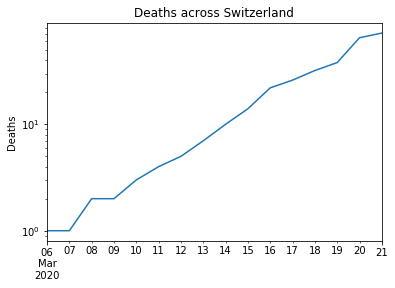

In [10]:
ax = ch.plot(legend=None, title="Deaths across Switzerland")
ax.set_ylabel("Deaths");
ax.set_yscale('log', nonposy='clip')

## Confirmed cases

Read https://ourworldindata.org/coronavirus#cases-of-covid-19 for caveats when it comes to interpreting these numbers.

In [11]:
confirmed_per_canton = transform_df(df, "ncumul_conf", "Cases")

In [12]:
# Look at the last few days to double check data
confirmed_per_canton.tail().T

2020-03-17  2020-03-18  2020-03-19  2020-03-20  2020-03-21
      Canton                                                            
Cases AG            67.0       101.0       118.0       165.0       165.0
      AI             5.0         5.0         6.0         6.0         6.0
      AR             5.0        11.0        11.0        11.0        11.0
      BE           123.0       193.0       282.0       377.0       377.0
      BL            89.0       116.0       134.0       184.0       282.0
      BS           165.0       182.0       222.0       272.0       299.0
      FR            11.0        11.0        11.0        11.0        11.0
      GE             0.0         0.0         0.0       873.0       873.0
      GL            10.0        10.0        17.0        17.0        17.0
      GR             0.0       116.0       145.0       213.0       213.0
      JU             0.0         0.0        27.0        29.0        29.0
      LU             0.0        65.0        65.0        92.0       109.0
      NE             0.0         0.0         0.0       159.0       159.0
      NW             4.0         4.0        25.0        28.0        28.0
      OW             1.0         1.0         1.0         1.0         1.0
      SG            47.0        61.0        85.0        98.0        98.0
      SH             0.0         0.0         0.0        14.0        14.0
      SZ            13.0        13.0        13.0        13.0        13.0
      TG            23.0        32.0        36.0        49.0        56.0
      TI           422.0       511.0       638.0       834.0       918.0
      UR             2.0         5.0         7.0         7.0        12.0
      VD           608.0       796.0      1212.0      1432.0      1432.0
      VS            95.0        95.0       232.0       282.0       282.0
      ZG            24.0        24.0        24.0        48.0        48.0
      ZH           294.0       424.0       526.0       773.0       773.0

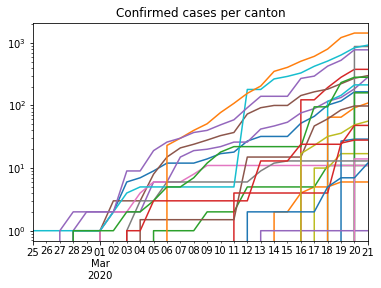

In [13]:
# this is a pretty messy plot, but it can serve as a base
# for picking out a few cantons or some such
ax = confirmed_per_canton.plot(legend=None, title="Confirmed cases per canton")
ax.set_yscale('log', nonposy='clip')

In [14]:
# Switzerland wide cases
ch = confirmed_per_canton.sum(axis=1)

In [15]:
print("It took {} days for the number of confirmed cases to double.".format(time_to_double(ch).days))

It took 3 days for the number of confirmed cases to double.


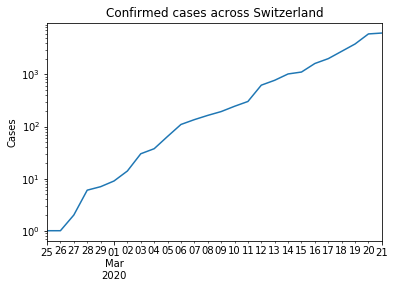

In [16]:
ax = ch.plot(legend=None, title="Confirmed cases across Switzerland")
ax.set_ylabel("Cases");
ax.set_yscale('log', nonposy='clip')

Created by Tim Head <betatim@gmail.com> licensed under CC-BY-4.